<a href="https://colab.research.google.com/github/DivyarajSunva/Data-Science-and-Business-Analyst/blob/main/Task_2_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Name : Divyarajsinh Sunva





###GRIP @ The Sparks Foundation #GRIPJUNE2023





### Task 2 : Prediction Using Unsupervised Machine Learning.

---



AIM : Predict the optimum number of clusters.

##Step - 1 : Importing the Libraries.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Step - 2 : Loading the dataset into python environment.

In [28]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [29]:
data = pd.read_csv('/drive/My Drive/SEM - 6/Summer Internship/Iris.csv',sep=',')
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##Step - 3 : Descriptive Statistics of Dataset.

In [30]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
data.isnull().mean()

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

There are no missing or null values present in the dataset.

In [34]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Step 4 - Data Visualization

In [35]:
#Importing the libraries
import seaborn as sns
import pickle
import os
%matplotlib inline

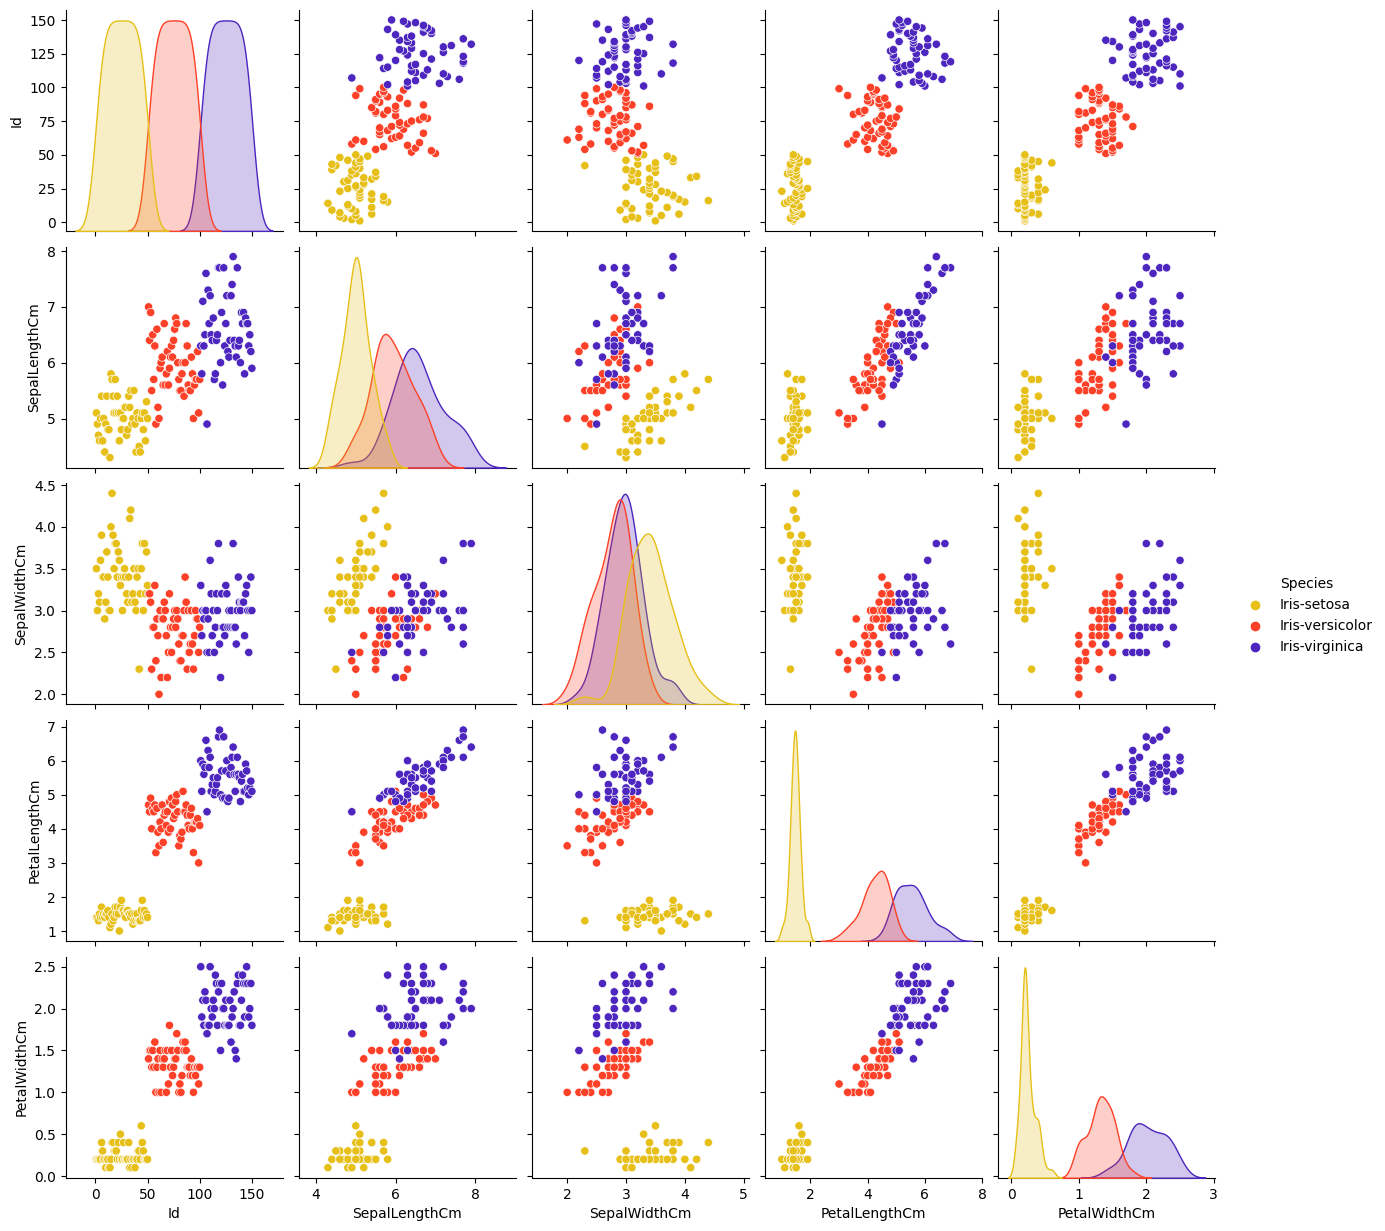

In [36]:
sns.pairplot(data, hue="Species", palette="CMRmap_r")
plt.show()

## Step 5 - Clustering

In [37]:
x = data.iloc[:, [0, 1, 2, 3]].values

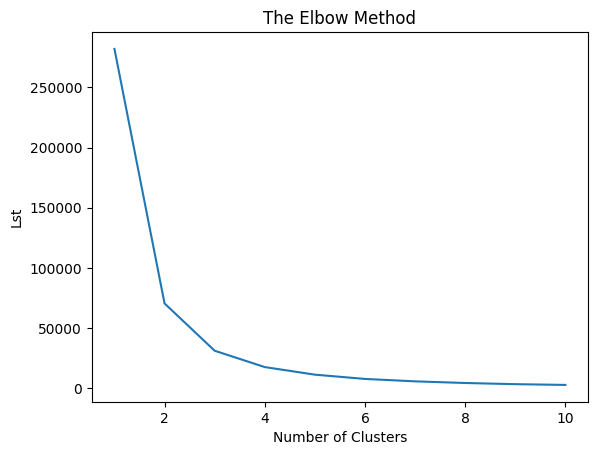

In [38]:
from sklearn.cluster import KMeans
lst = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter= 300, n_init = 10, random_state= 0)
  kmeans.fit(x)
  lst.append(kmeans.inertia_)


plt.plot(range(1, 11), lst)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Lst")
plt.show()

In [39]:
print(lst)

[281831.5446666667, 70581.38080000003, 31320.71120000001, 17758.792503556186, 11468.96874702381, 7921.8634730769245, 5911.632365518541, 4541.979023391813, 3571.9110955882347, 2943.933100840336]


In [40]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Step 6 - Visualization of Clusters

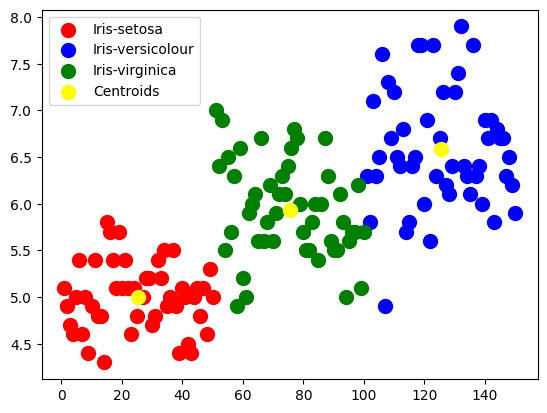

In [42]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()